## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined = pd.merge(study_results,mouse_metadata, on='Mouse ID',  how='outer')
quartiles_df = pd.merge(study_results,mouse_metadata, on='Mouse ID',  how='outer')
mouse_plots = pd.merge(study_results,mouse_metadata, on='Mouse ID',  how='outer')
mouse_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
mouse_combined_count = len(mouse_combined["Mouse ID"].unique())
mouse_combined_count

249

In [3]:
mouse_combined_dp = mouse_combined[mouse_combined.duplicated(['Mouse ID', 'Timepoint'])]

print(mouse_combined_dp["Mouse ID"].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_combined.loc[mouse_combined['Mouse ID'] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_duplicates = mouse_combined[ (mouse_combined['Mouse ID'] == "g989") ].index
mouse_combined.drop(mouse_duplicates , inplace=True)
count_mice = len(mouse_combined["Mouse ID"].unique())
count_mice


248

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = mouse_combined.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats
# This method produces everything in a single groupby function.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
mouse_combined.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

Text(0.5, 1.0, 'Count per Drug Regimen')

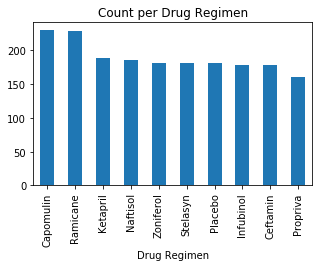

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouse_per_treatment = mouse_plots.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending = False)

mouse_per_treatment.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")





<BarContainer object of 10 artists>

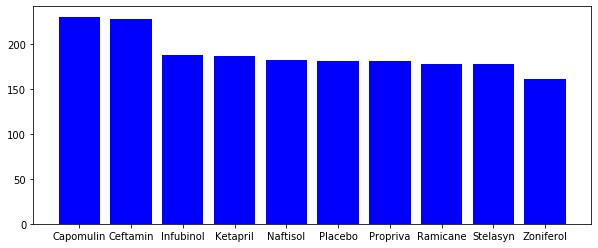

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_regimens = summary_stats.index.tolist()

x_axis = np.arange(len(drug_regimens))

# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(drug_regimens, mouse_per_treatment, color='b', alpha=1, align="center")





## Pie Plots

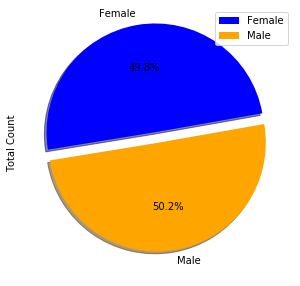

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_plots.drop_duplicates("Mouse ID")

gender_group = gender_count.groupby("Sex").count()
gender_group_red=gender_group[["Mouse ID"]]
gender_group_red=gender_group_red.rename(columns={"Mouse ID": "Total Count"})
colors = ['blue', 'orange']
explode = (0.1, 0)
gender_group_red.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=10, explode = explode,
                                 shadow = True, autopct="%1.1f%%")

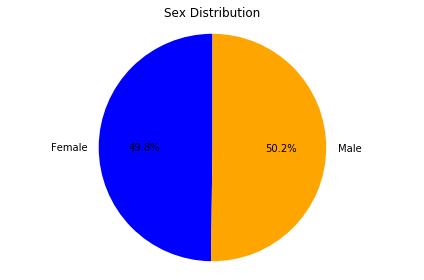

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plt = gender_count.groupby(["Sex"], as_index=False).count()
gender_plt=gender_plt.rename(columns={"Mouse ID": "Total Count"})

plt.pie(gender_plt['Total Count'],labels=gender_plt['Sex'],shadow=False,colors=colors,startangle=90,autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')
plt.title("Sex Distribution")

# View the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
df_max = quartiles_df.groupby(['Drug Regimen',"Mouse ID"],as_index=False)['Timepoint'].max()
quartiles_mx = pd.merge(df_max, quartiles_df, on=("Mouse ID","Timepoint"),how="left")
quartiles_mx_red = quartiles_mx[["Drug Regimen_x","Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
df_new_index_2  = quartiles_mx_red.set_index('Drug Regimen_x')

In [25]:
drug_regimens = summary_stats.index.tolist()
data_to_plot=[]
data_lower = []
data_upper = []
iqr_= []
outliers_list =[]
for x in drug_regimens:
    tumor = df_new_index_2.filter(like=x, axis=0)["Tumor Volume (mm3)"]
    data_to_plot.append(tumor)
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    data_lower.append(lower_bound)
    data_upper.append(upper_bound)
    iqr_.append(iqr)
    print(f"{x} potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers and the IQR is {iqr}.")
    outliers = [x for x in tumor if x < lower_bound or x > upper_bound]
    outliers_list.append(outliers)
    print(f"Identified outliers: {len(outliers)} {outliers}")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers and the IQR is 7.781863460000004.
Identified outliers: 0 []
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers and the IQR is 15.577752179999997.
Identified outliers: 0 []
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers and the IQR is 11.477135160000003.
Identified outliers: 1 [36.321345799999996]
Ketapril potential outliers could be values below 36.99186244000001 and above 89.60048379999998 could be outliers and the IQR is 13.152155339999993.
Identified outliers: 0 []
Naftisol potential outliers could be values below 25.85334408499999 and above 95.78978676500002 could be outliers and the IQR is 17.484110670000007.
Identified outliers: 0 []
Placebo potential outliers could be values below 30.15582196999999 and above 90.92136789000001 could be outlier

In [27]:
outliers_list

[[], [], [36.321345799999996], [], [], [], [], [], [], []]

In [35]:
outliers_df = pd.DataFrame({"Drug Regiment":drug_regimens,"Lower Bound":data_lower,
                            "Upper Bound":data_upper, "IQR":iqr_, "Outliers":outliers_list})
outliers_df                           

,Drug Regiment,Lower Bound,Upper Bound,IQR,Outliers
0,Capomulin,20.704562,51.832015,7.781863,[]
1,Ceftamin,25.355450,87.666458,15.577752,[]
2,Infubinol,36.832905,82.741446,11.477135,[36.321345799999996]
3,Ketapril,36.991862,89.600484,13.152155,[]
4,Naftisol,25.853344,95.789787,17.484111,[]
5,Placebo,30.155822,90.921368,15.191386,[]
6,Propriva,28.951103,82.742746,13.447911,[]
7,Ramicane,17.912664,54.306811,9.098537,[]
8,Stelasyn,27.535572,94.044968,16.627349,[]
9,Zoniferol,24.779522,92.002936,16.805854,[]


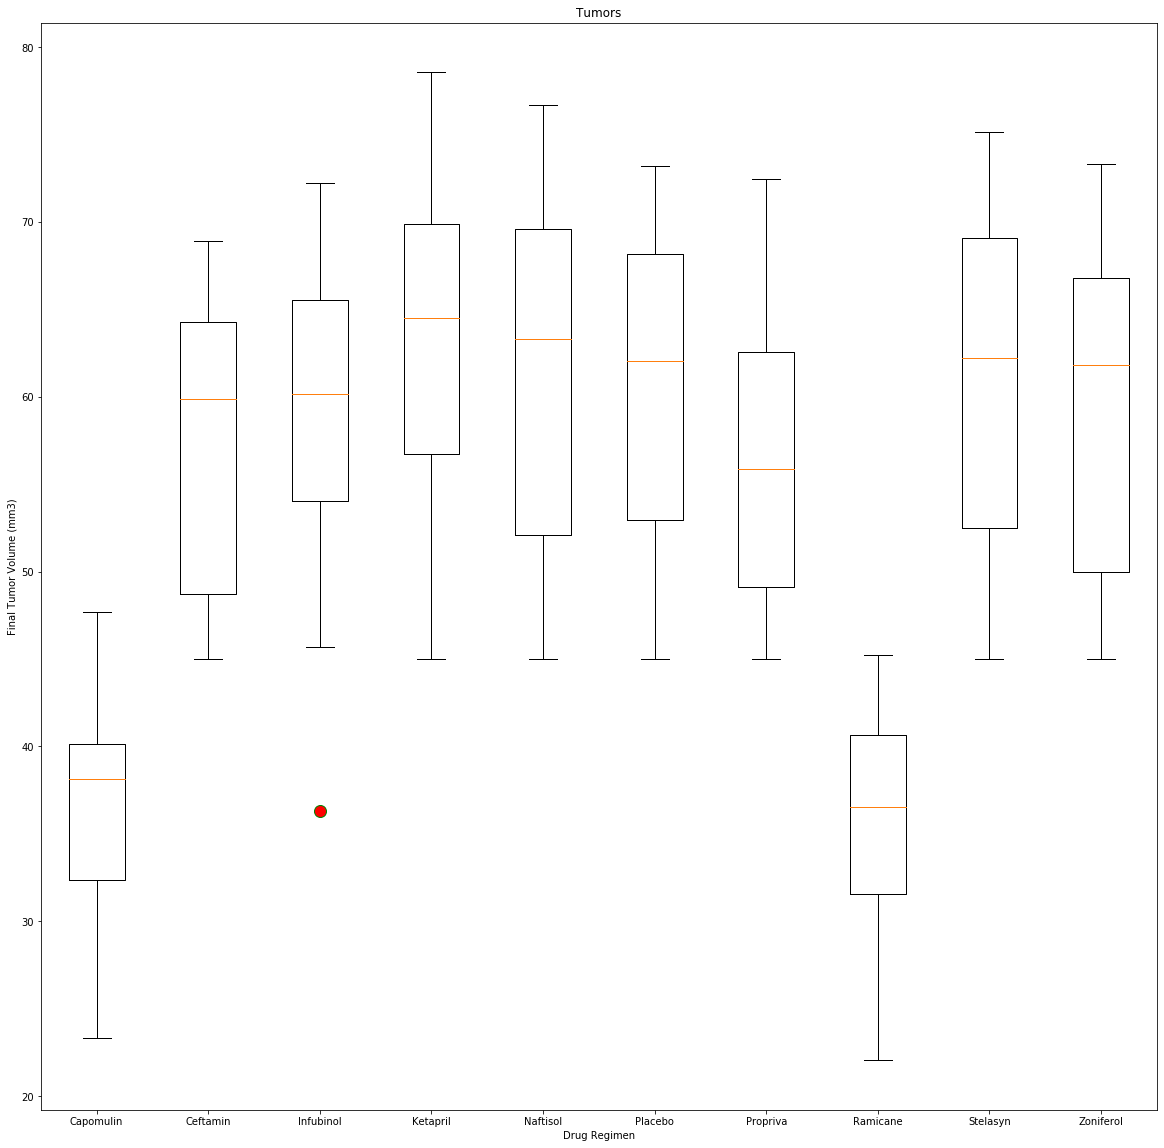

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots(1, 1, figsize=(20,20))
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
ax1.boxplot(data_to_plot,labels=drug_regimens,flierprops=flierprops)

plt.show()



## Line and Scatter Plots

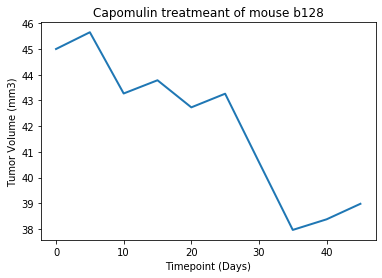

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

forline_df = mouse_plots.loc[mouse_plots["Mouse ID"] == "b128",:]
x_axisTP = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axisTP, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

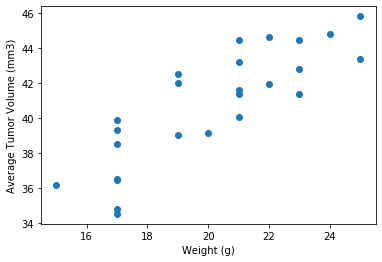

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin  = mouse_combined.set_index('Drug Regimen')

capomulin= capomulin.filter(like="Capomulin", axis=0)
capavg = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


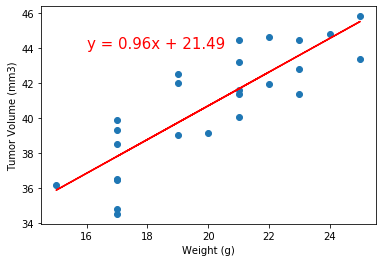

In [20]:
# Calculate the correlation coefficient and linear regression model 
corr=round(sts.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

